In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from typing import Optional
from fcmeans import FCM
from sklearn.decomposition import PCA

In [2]:
from navec import Navec
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [3]:
data = pd.read_csv('book_new.csv', header=None)

In [4]:
data

,0
0,электронная торговля
1,локальные и глобальные экстремумы
2,перекредитование
3,робототехника
4,процессное управление
...,...
938,предприятие
939,кредитные ресурсы
940,рентабельность чистой прибыли
941,региональные вузы


In [5]:
class PhraseEmbeddings:
    def __init__(self, phrase, embbedings):
        self.phrase: string = phrase
        self.embbedings: [float] = embbedings

def calculateEmbeddingsForSplittedPhrase(phrase: [string]) -> Optional[PhraseEmbeddings]:
    embeddings: [[]] = []
        
    for word in phrase:
        tempEmbedding = navec.get(word)

        if tempEmbedding is not None:
            embeddings.append(tempEmbedding)

    if len(embeddings) != 0:
        return PhraseEmbeddings(' '.join(phrase), np.mean(embeddings, axis=0))
    else:
        # return None -> if navec could not determine the embeddings of all words of the phrase.
        return None

In [6]:
emb = []
phrases = []
i = 0
for row in data[0]:
    if len(row.split()) == 1:
        res = navec.get(row)
        if res is not None:
            emb.append(res)
            phrases.append(row)
    else:
        res = calculateEmbeddingsForSplittedPhrase(np.array(row.split()))
        if res is not None:
            emb.append(res.embbedings)
            phrases.append(row)

In [7]:
Z = np.array(phrases)

In [8]:
Z.shape

(907,)

In [9]:
X = np.array(emb)

In [10]:
X.shape

(907, 300)

In [41]:
d1 = pd.DataFrame(X)
d1.shape

(907, 300)

In [12]:
#pd.DataFrame(X).to_csv('keywords_embeddingd_25_11_21.csv', header=False, index=False)

In [42]:
k = 20
fcm = FCM(n_clusters=k, random_state=1)
fcm.fit(X)

In [43]:
y_pred = fcm.u
y_pred.shape

(907, 20)

In [44]:
clusters = fcm.centers

In [45]:
d2 = pd.DataFrame(clusters)
d2.shape

(20, 300)

In [46]:
d3 = pd.read_csv('publication.csv', header=None)
d3.shape

(13, 300)

In [18]:
#pd.DataFrame(clusters).to_csv('cluster_centers_25_11_21.csv', header=False, index=False)

In [19]:
#topics = []

#for i_word, y in enumerate(y_pred):
 #   for i, e in enumerate(y):
  #      if e > 1/k:
   #         topics.append([Z[i_word], i, (e-1/k)*1e8])

In [20]:
#dft = pd.DataFrame(topics, columns=['Ключевая фраза','Кластер', 'Вес'])

In [21]:
#dft

In [47]:
#dft.to_csv('clustering_14_04_21.csv')

In [48]:
d1['target'] = 'Elements'
d2['target'] = 'Centers'
d3['target'] = 'Keywords'
data = d1.append(d2).append(d3)
data = data.reset_index(drop=True)
data.shape

(940, 301)

In [49]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.iloc[:,:-1])
data_df = pd.DataFrame(data_2d)
data_df['target'] = data['target']
data_df.shape

(940, 3)

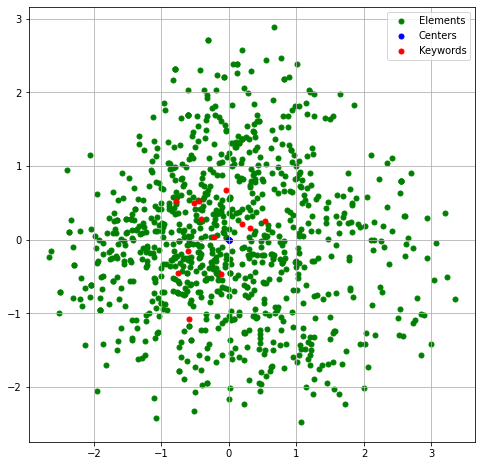

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Elements', 'Centers', 'Keywords']
colors = ['g', 'b', 'r']
markers = ['o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = data_df['target'] == target
    ax.scatter(data_df.loc[indicesToKeep, 0]
               , data_df.loc[indicesToKeep, 1]
               , c = color
               , s = 25
               , marker = marker
              )
ax.legend(targets)
ax.grid()

In [26]:
fcm_labels = fcm.predict(X)
d1['cluster'] = fcm_labels
un = pd.Series(fcm_labels).unique()
d1

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,target,cluster
0,0.470398,0.112959,0.576481,0.284319,-0.299085,-0.224326,-0.123794,0.032323,0.204704,0.245813,...,-0.253576,-0.444092,0.272521,-0.530659,0.355826,0.271354,0.680932,-0.512406,Elements,14
1,0.049944,-0.155750,-0.163262,0.342427,0.344525,0.220851,0.145824,0.273347,0.079700,-0.416764,...,-0.085463,0.072925,0.030810,-0.426010,0.167298,0.435681,0.076551,0.146231,Elements,4
2,0.528656,0.087556,0.443964,-0.145310,-0.210084,-0.233264,0.310592,-0.061819,0.066595,0.219590,...,-0.423535,-0.439198,0.149286,0.226566,-0.068306,0.465650,0.187808,-0.547966,Elements,14
3,0.496091,-0.221561,0.102886,0.463391,-0.310837,-0.004631,-0.230791,-0.140402,0.273410,0.160696,...,-0.553314,-0.424678,0.583743,0.146704,-0.115241,-0.394309,0.059847,0.012294,Elements,5
4,0.325686,0.007507,0.568607,0.200070,0.303783,0.257717,-0.551907,-0.138469,0.155176,0.157008,...,-0.281144,-0.151199,0.285765,-0.678817,0.039957,0.485594,0.250473,0.650174,Elements,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.039911,0.310089,-0.052410,0.690485,0.085759,-0.538098,-0.081525,-0.732197,0.128270,0.160696,...,-0.190175,-0.183027,-0.112056,0.058064,0.227423,-0.710195,0.474270,0.407580,Elements,18
903,-0.383756,0.240404,0.678290,0.307314,0.203173,-0.122892,-0.171259,-0.043626,-0.005897,-0.538416,...,0.495865,-0.275291,-0.508066,-0.477942,-0.214610,0.054864,0.455759,-0.196776,Elements,16
904,0.220746,-0.115841,-0.068942,0.492760,0.386467,0.067229,-0.147106,-0.217962,0.322650,-0.236095,...,-0.170360,0.219739,-0.176334,-0.161617,0.170335,0.026640,0.317188,0.440498,Elements,18
905,0.324901,-0.105517,-0.018070,0.002441,0.072228,0.218173,0.031727,0.002664,-0.121350,-0.336530,...,0.046304,0.116934,0.010155,-0.234406,-0.200940,0.259402,-0.085605,0.100587,Elements,18


In [27]:
pca2 = PCA(n_components=2)
d1_2d = pca2.fit_transform(d1.iloc[:,:-2])
d1_df = pd.DataFrame(d1_2d)
d1_df['cluster'] = d1['cluster']
d1_df

,0,1,cluster
0,0.993716,-0.260779,14
1,-0.499844,0.240502,4
2,2.792088,-0.807081,14
3,-1.448803,0.288697,5
4,1.024599,1.840765,6
...,...,...,...
902,0.108800,2.415887,18
903,-0.139851,1.613459,16
904,0.150270,0.782950,18
905,0.784516,0.757909,18


In [28]:
un

array([14,  4,  5,  6, 18, 16, 12,  8,  3,  2], dtype=int64)

In [29]:
fcm_cluster_labels = fcm.predict(clusters)
d2['cluster'] = fcm_cluster_labels
d2

H:\Anaconda\envs\fuzzy_c_means\lib\site-packages\fcmeans\fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
H:\Anaconda\envs\fuzzy_c_means\lib\site-packages\fcmeans\fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,target,cluster
0,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,0
1,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041551,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,1
2,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041551,0.012787,0.06941,-0.146886,-0.053822,0.174342,0.265626,0.184215,Centers,2
3,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,3
4,0.135065,0.101104,0.128372,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,4
5,0.135065,0.101104,0.128372,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,5
6,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,6
7,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,7
8,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041551,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,8
9,0.135065,0.101104,0.128373,0.105094,-0.053834,0.104711,-0.05073,0.029609,0.151539,0.078254,...,-0.041550,0.012787,0.06941,-0.146886,-0.053822,0.174341,0.265626,0.184215,Centers,9


In [30]:
d2_2d = pca2.fit_transform(d2.iloc[:,:-2])
d2_df = pd.DataFrame(d2_2d)
d2_df['cluster'] = d2['cluster']
d2_df

,0,1,cluster
0,-3.937943e-07,8.070268e-09,0
1,3.712087e-07,7.592841e-08,1
2,9.134068e-07,-4.122036e-07,2
3,1.268073e-08,1.006299e-07,3
4,-2.687172e-06,5.125734e-07,4
5,-2.622698e-06,-3.199148e-07,5
6,1.985242e-06,9.528476e-07,6
7,-4.457352e-07,-3.812930e-08,7
8,-9.813543e-07,-7.016126e-07,8
9,-7.437327e-07,-4.619324e-08,9


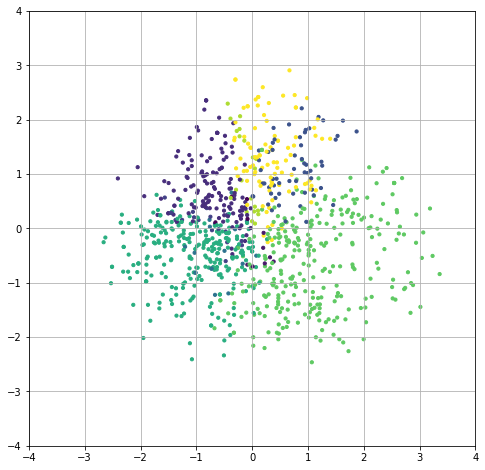

In [31]:
fig = plt.figure(figsize = (8,8))
plt.scatter(d1_df[0], d1_df[1], c = d1_df['cluster'], s = 10)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.grid()
plt.show()

14


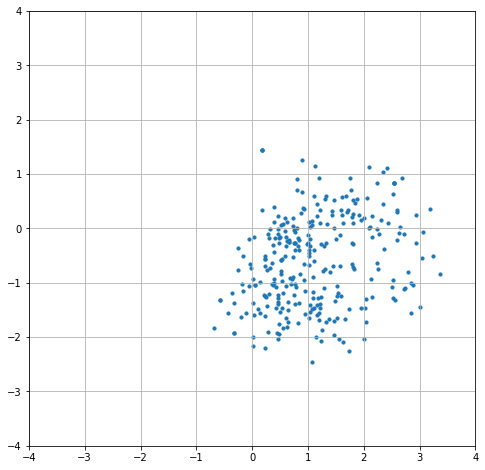

4


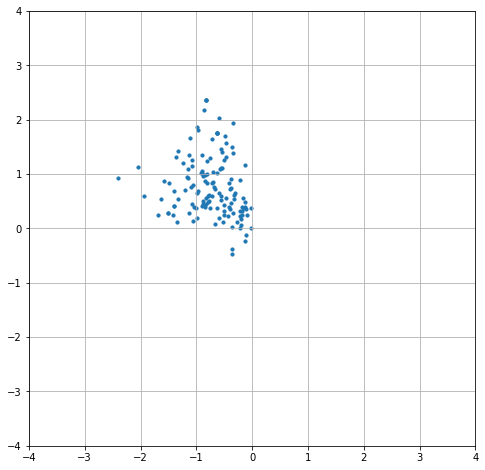

5


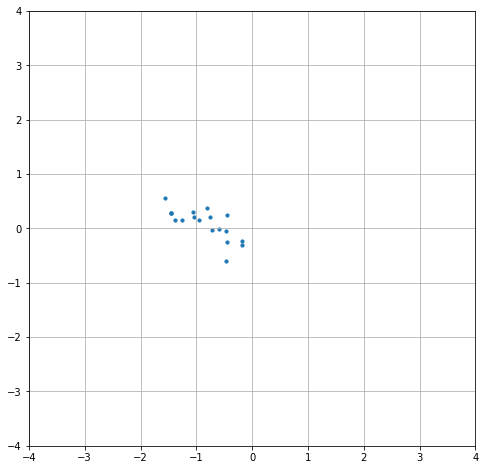

6


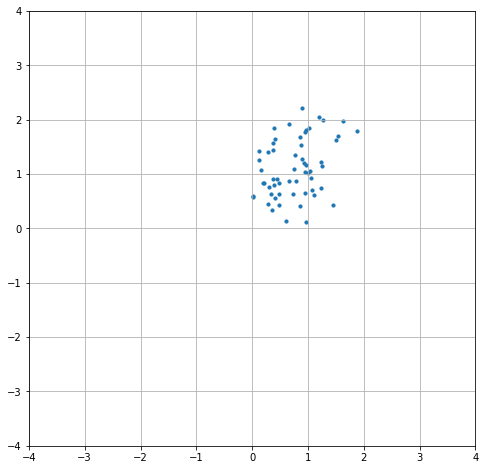

18


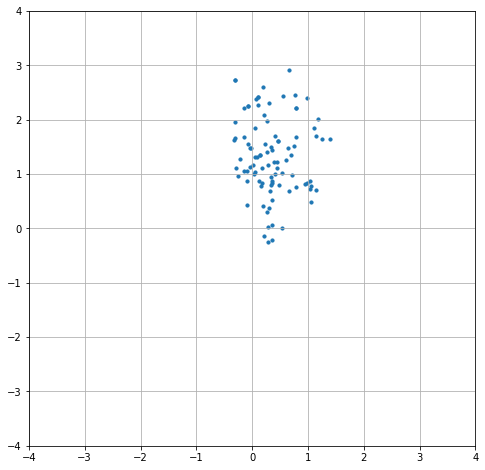

16


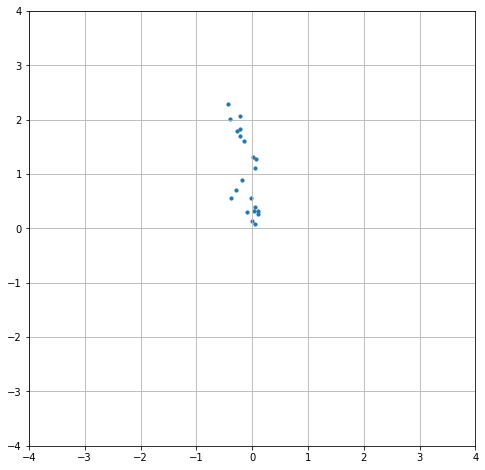

12


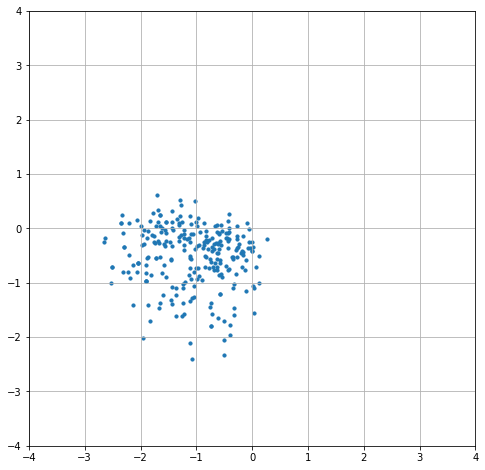

8


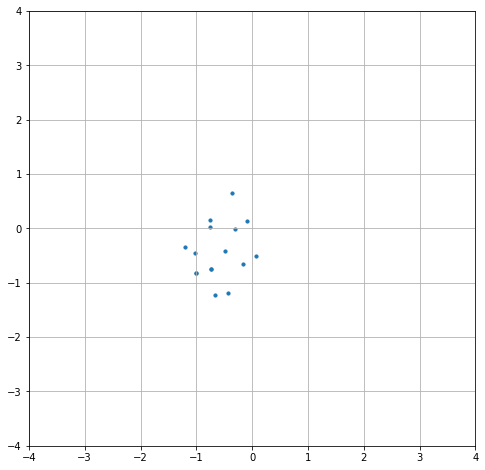

3


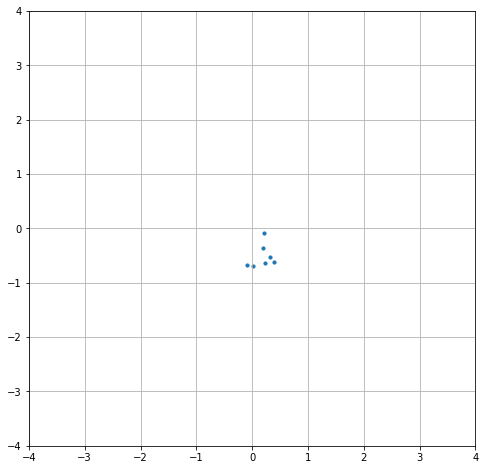

2


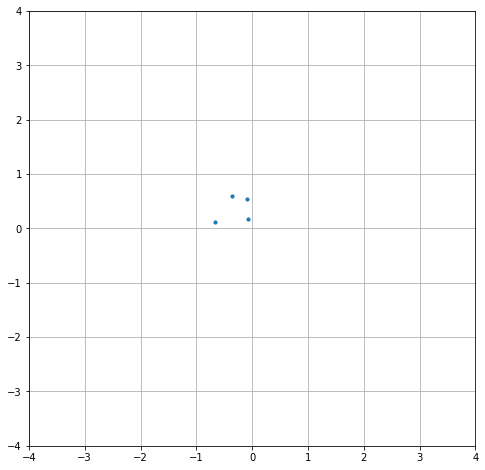

In [32]:
for cluster in un:
    print(cluster)
    fig = plt.figure(figsize = (8,8))
    plt.scatter(d1_df[d1_df['cluster']==cluster][0], d1_df[d1_df['cluster']==cluster][1], s = 10)
    plt.xlim([-4,4])
    plt.ylim([-4,4])
    plt.grid()
    plt.show()